#### Zugriff aus python mit Hilfe von Pandas

In [1]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime
import sklearn

Baue eine Verbindung zur meiner Datenbank auf:

In [2]:
conn = sql.connect('/Users/cm/20190425/home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [3]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [4]:
events = pd.read_sql_query('select * from events', conn)

In [5]:
events.tail(100)

,event_id,event_type,event_data,origin,time_fired,created,context_id,context_user_id
63161,78492,state_changed,"{""entity_id"": ""sensor.kitchen_ht_set_temperatu...",LOCAL,2019-04-25 12:57:07.753329,2019-04-25 12:57:12.625661,ac3e2181335a42bdb058f42aaeb09449,None
63162,78493,state_changed,"{""entity_id"": ""sensor.kitchen_ht_mode"", ""old_s...",LOCAL,2019-04-25 12:57:07.753946,2019-04-25 12:57:12.686816,481c9e55a1984702925a1aa579cd32a4,None
63163,78494,state_changed,"{""entity_id"": ""sensor.living_room_wt_current_t...",LOCAL,2019-04-25 12:57:07.754587,2019-04-25 12:57:12.742030,064e746db86947d4af812803ed33e6fb,None
63164,78495,state_changed,"{""entity_id"": ""sensor.living_room_wt_set_tempe...",LOCAL,2019-04-25 12:57:07.755236,2019-04-25 12:57:12.799057,d52e16385b684f34868dc2da50c322a5,None
63165,78496,state_changed,"{""entity_id"": ""sensor.bath_wt_current_temperat...",LOCAL,2019-04-25 12:57:07.755875,2019-04-25 12:57:12.858902,da4fe904316d40e0b3590fe8097c26a7,None
63166,78497,state_changed,"{""entity_id"": ""sensor.living_room_wt_mode"", ""o...",LOCAL,2019-04-25 12:57:07.756507,2019-04-25 12:57:12.965640,e8bde5da8c18462ca2907b938efc7d1e,None
63167,78498,state_changed,"{""entity_id"": ""sensor.living_room_ht_south_cur...",LOCAL,2019-04-25 12:57:07.757181,2019-04-25 12:57:13.080651,c69fee54753f4b31979c5a2bbaaa93d1,None
63168,78499,state_changed,"{""entity_id"": ""sensor.bath_wt_set_temperature""...",LOCAL,2019-04-25 12:57:07.757931,2019-04-25 12:57:13.146427,0a13c4bb92134e8b99380c25ea3c55dd,None
63169,78500,state_changed,"{""entity_id"": ""sensor.living_room_ht_south_set...",LOCAL,2019-04-25 12:57:07.758645,2019-04-25 12:57:13.213443,8e4913ee1de847ad9de42ada6fd10562,None
63170,78501,state_changed,"{""entity_id"": ""sensor.living_room_ht_south_mod...",LOCAL,2019-04-25 12:57:07.759314,2019-04-25 12:57:13.276069,1e4787d8b58a47398ac9075ced46bcdd,None


#### Tabelle recorder_runs einlesen

In [6]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [7]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-14 20:25:23.434947,2019-03-14 20:30:46.775168,0,2019-03-14 20:25:26.805756
1,2,2019-03-14 20:30:58.627587,2019-03-14 20:34:30.843322,0,2019-03-14 20:31:01.310771
2,3,2019-03-14 20:34:43.543716,2019-03-14 20:37:48.007651,0,2019-03-14 20:34:46.236966
3,4,2019-03-14 20:37:59.974984,2019-03-14 20:42:23.147717,0,2019-03-14 20:38:02.612598
4,5,2019-03-14 20:42:35.949202,2019-03-14 20:59:04.860145,0,2019-03-14 20:42:38.634857


#### Tabelle schema_changes einlesen

In [8]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [9]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-14 20:25:26.737487


#### Tabelle states einlesen

In [10]:
states = pd.read_sql_query('select * from states', conn)

In [11]:
weather_opts =['weather_temperature','precipitation','wind_speed','pressure','wind_direction','humidity','fog','cloudiness','low_clouds','medium_clouds','high_clouds','dewpoint_temperature']

In [12]:
states

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
0,14760,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15331,2019-03-21 17:32:01.015463,2019-03-21 20:51:30.006466,2019-03-21 20:51:30.020563,67917ca4c1ab4d7bba1d6b391ea61c1b,None
1,14761,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15332,2019-03-21 17:32:01.015463,2019-03-21 20:52:30.007403,2019-03-21 20:52:30.023784,aa605a98d35341509de25f501beef6d6,None
2,14762,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 17.1, ""min_temp"": 4.5,...",15333,2019-03-19 12:22:26.953017,2019-03-21 20:53:10.910853,2019-03-21 20:53:10.920476,db71971761af464eb7e1cf61ddacb389,None
3,14763,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15334,2019-03-21 17:32:01.015463,2019-03-21 20:53:30.006365,2019-03-21 20:53:30.022461,16937b9f6909421899abb219c5c80257,None
4,14764,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15335,2019-03-21 17:32:01.015463,2019-03-21 20:54:30.006633,2019-03-21 20:54:30.022572,8fe8a4a335c845c09e219da8956d3d7e,None
5,14765,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15336,2019-03-21 17:32:01.015463,2019-03-21 20:55:30.006516,2019-03-21 20:55:30.022468,a764043f02004f42a9cc8ef54b1cfe18,None
6,14766,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15337,2019-03-21 17:32:01.015463,2019-03-21 20:56:30.006911,2019-03-21 20:56:30.022707,e4cf0671377a4cfbb097dfa8e4152468,None
7,14767,sun,sun.sun,below_horizon,"{""next_dawn"": ""2019-03-22T04:42:34+00:00"", ""ne...",15338,2019-03-21 17:32:01.015463,2019-03-21 20:57:30.006721,2019-03-21 20:57:30.022871,dd9fd1f18c894f6f974d7c382ac8b96e,None
8,14768,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15339,2019-03-19 12:22:26.953017,2019-03-21 20:58:15.903207,2019-03-21 20:58:15.923933,43546b1dcaa64b669b7083caa7125fbc,None
9,14769,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15340,2019-03-19 12:22:26.931085,2019-03-21 20:58:15.919782,2019-03-21 20:58:15.995962,6e869e6a5c984d5c8c2ed07a8f1f54e5,None


### Vertiefung der Datensuche in der states Tabelle entity sensor

In [13]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [14]:
weather = states[states['entity_id'].str.contains('weather')]

In [15]:
weather.loc[:,'last_updated'] = weather.loc[:,'last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
weatherdata={}
for opt in weather_opts:
    df = states[states['entity_id'].str.contains(opt)][['state','last_updated']]
    df = df[df.state !='unknown']
    weatherdata[opt] = df
    
#states['entity_id'].str.contains('wind_speed')

In [17]:
weatherdata['weather_temperature'].tail(80)

,state,last_updated
54711,17.6,2019-04-22 18:31:00.074710
54782,16.2,2019-04-22 19:31:00.069808
54854,15.1,2019-04-22 20:31:00.071951
54867,13.1,2019-04-22 20:39:26.783308
54931,13.0,2019-04-22 21:31:00.079182
55070,12.0,2019-04-22 23:31:00.079818
55139,11.8,2019-04-23 00:31:00.075387
55207,11.7,2019-04-23 01:31:00.074365
55281,11.3,2019-04-23 02:31:00.077697
55349,11.1,2019-04-23 03:31:00.074912


In [18]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room.head(10)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
6380,21140,sensor,sensor.living_room_wt_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22264,2019-03-25 19:57:44.973797,2019-03-25 19:57:44.973797,2019-03-25 19:57:52.070935,ce0fc3a423974300a3692d82d30655dc,None
6381,21141,sensor,sensor.living_room_wt_set_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22265,2019-03-25 19:57:44.974569,2019-03-25 19:57:44.974569,2019-03-25 19:57:52.136055,86d6f368cd094e108494d4086f90c220,None
6382,21142,sensor,sensor.living_room_wt_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22266,2019-03-25 19:57:44.975335,2019-03-25 19:57:44.975335,2019-03-25 19:57:52.200638,fe08497741454ef89601ce0c53f7518c,None
6383,21143,sensor,sensor.living_room_ht_south_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22267,2019-03-25 19:57:44.976205,2019-03-25 19:57:44.976205,2019-03-25 19:57:52.254811,aebbee5404cf4187bb0636b942519ed3,None
6384,21144,sensor,sensor.living_room_ht_south_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22268,2019-03-25 19:57:44.977049,2019-03-25 19:57:44.977049,2019-03-25 19:57:52.315175,e598396b4caf420db8959e76cba927eb,None
6385,21145,sensor,sensor.living_room_ht_south_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22269,2019-03-25 19:57:44.977866,2019-03-25 19:57:44.977866,2019-03-25 19:57:52.376552,1198268b5e5e4f29b194fe06cf126691,None
6386,21146,sensor,sensor.living_room_ht_north_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22270,2019-03-25 19:57:44.978697,2019-03-25 19:57:44.978697,2019-03-25 19:57:52.435386,9f20634456b44ca1be6f8cbec30b0c4f,None
6387,21147,sensor,sensor.living_room_ht_north_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22271,2019-03-25 19:57:44.979541,2019-03-25 19:57:44.979541,2019-03-25 19:57:52.484922,54fae313ec214491959b117a9b8040d9,None
6388,21148,sensor,sensor.living_room_ht_north_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22272,2019-03-25 19:57:44.980351,2019-03-25 19:57:44.980351,2019-03-25 19:57:52.548418,09e6f991d1a64fdfa4a4084584558e58,None
6420,21180,sensor,sensor.living_room_wt_current_temperature,20.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22337,2019-03-25 19:57:46.455667,2019-03-25 19:57:46.455667,2019-03-25 19:57:56.420053,bb15d6ccf39a409f9412be8b57570944,None


In [19]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [20]:
living_room_wt_tcurr.loc[:,'last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
living_room_wt_tset.loc[:,'last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [22]:
living_room_wt_tcurr[living_room_wt_tcurr.state =='unknown']

,entity_id,state,last_updated
6380,sensor.living_room_wt_current_temperature,unknown,2019-03-25 19:57:44.973797
6467,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:16:55.788703
6532,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:19:18.571112
6606,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:20:51.046538
13573,sensor.living_room_wt_current_temperature,unknown,2019-04-01 18:25:58.493465
13686,sensor.living_room_wt_current_temperature,unknown,2019-04-01 18:31:22.275019
14040,sensor.living_room_wt_current_temperature,unknown,2019-04-02 18:15:06.541663
59312,sensor.living_room_wt_current_temperature,unknown,2019-04-25 11:48:08.129862
59400,sensor.living_room_wt_current_temperature,unknown,2019-04-25 11:53:35.075564
59526,sensor.living_room_wt_current_temperature,unknown,2019-04-25 11:56:03.864929


In [26]:
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='unknown']
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='None']
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [27]:
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='unknown']
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='None']
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)

In [28]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated
14761,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:07:45.024408
14766,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:10:49.858501
14815,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:44:22.906733
14832,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:56:33.026497
14837,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:59:36.022962


/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


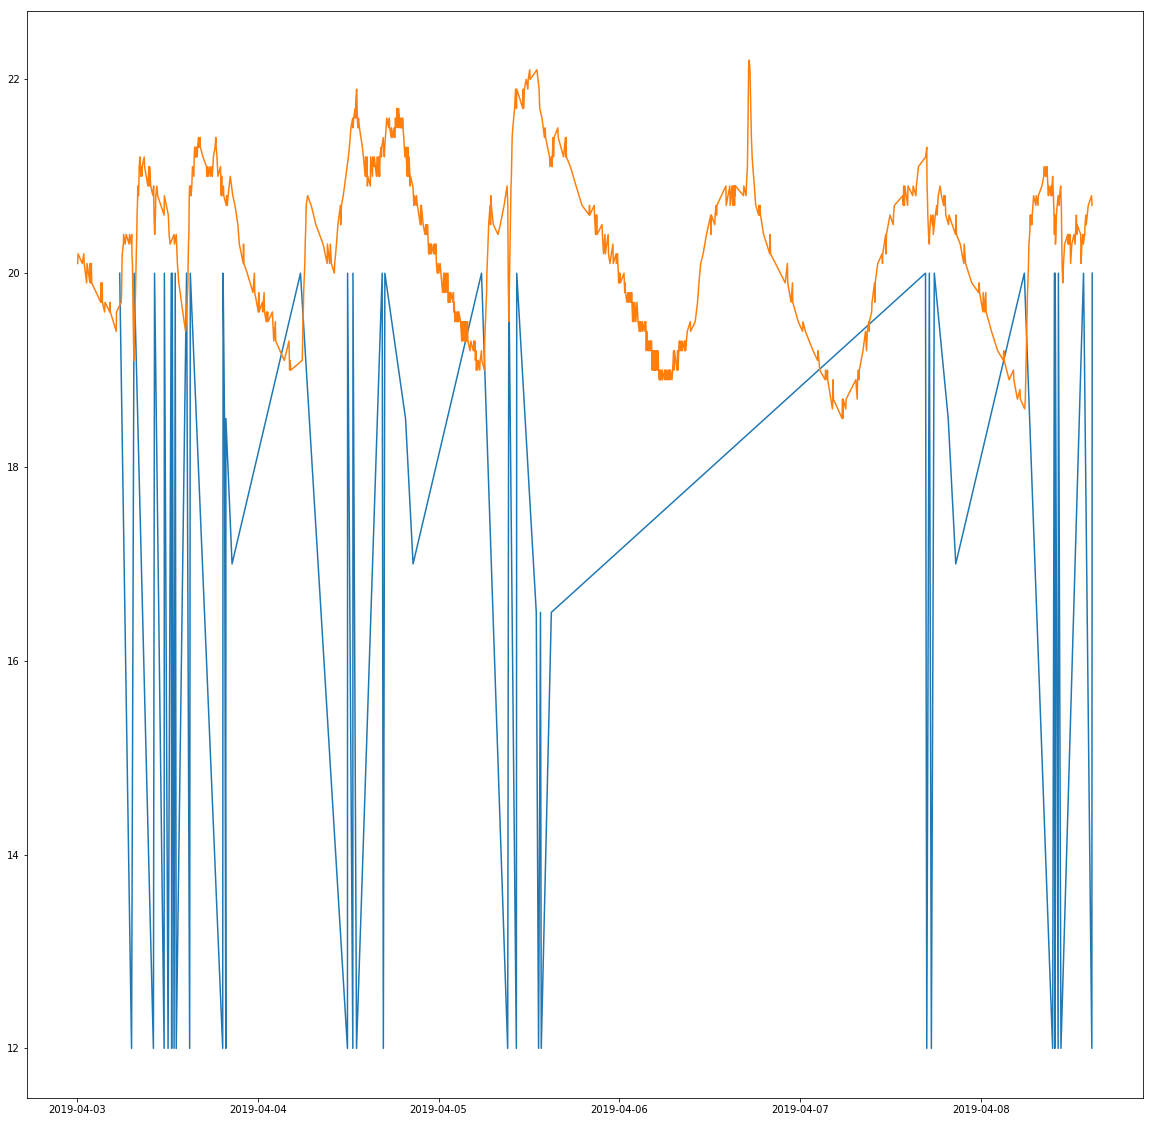

In [29]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [30]:
end_date = np.datetime64('2019-04-25 23:59:00')
start_date = np.datetime64('2019-04-03 00:00:00')

In [31]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.bad_fensterkontakt_bad,27
1,binary_sensor.kuche_fensterkontakt_ku,27
2,binary_sensor.remote_ui,13
3,binary_sensor.schlafzimmer_fensterkontakt_sz,47
4,binary_sensor.wohnzimmer_fensterkontakt_nord,63


In [32]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated
14761,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:07:45.024408
14766,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:10:49.858501
14815,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:44:22.906733
14832,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:56:33.026497
14837,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:59:36.022962


In [33]:
#if living_room_wt_tcurr.dtypes[2] != np.:

living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

TypeError: Parser must be a string or character stream, not Timestamp

In [34]:
living_room_wt_tcurr.dtypes[2]

dtype('<M8[ns]')

In [35]:
living_room_wt_tcurr['weekday'] = living_room_wt_tcurr['last_updated'].dt.weekday
living_room_wt_tcurr['time'] = living_room_wt_tcurr['last_updated'].dt.time

In [36]:
living_room_wt_tcurr['time'] = living_room_wt_tcurr['time'].map(lambda x:x.hour+x.minute/60.0)

In [37]:
X_train = living_room_wt_tcurr.drop(['entity_id','state','last_updated'], axis=1)
y_train = living_room_wt_tcurr['state']

In [38]:
X_train.shape

(840, 2)

In [45]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [ ]:
climate = states[states['entity_id'].str.contains('climate')]

In [ ]:
climate.groupby('entity_id').agg('sum')

In [ ]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('wohn')]
state_climate_living_room.tail(2)

In [52]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]

In [53]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [54]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [55]:
state_climate_living_room['weekday'] = state_climate_living_room['last_updated'].dt.weekday
state_climate_living_room['time'] = state_climate_living_room['last_updated'].dt.time

In [56]:
state_climate_living_room.head(2)

,entity_id,state,attributes,last_updated,weekday,time
14748,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.0, ""min_temp"": 4.5,...",2019-04-03 00:01:39.011027,2,00:01:39.011027
14755,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 19.8, ""min_temp"": 4.5,...",2019-04-03 00:04:42.008518,2,00:04:42.008518


In [57]:
#state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [58]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dicti = json.loads(json_acceptable_string)
    current_temp.append(dicti['current_temperature'])
    set_temp.append(dicti['temperature'])

In [59]:
state_climate_living_room['current_temp'] = current_temp
state_climate_living_room['set_temp'] = set_temp

In [60]:
state_climate_living_room_as_x = state_climate_living_room.drop(['entity_id','attributes','last_updated'],axis=1)

In [61]:
state_climate_living_room_as_x.head(30)

,state,weekday,time,current_temp,set_temp
14748,auto,2,00:01:39.011027,20.0,18.0
14755,auto,2,00:04:42.008518,19.8,18.0
14896,auto,2,01:34:10.010345,19.6,18.0
14900,auto,2,01:36:12.010931,19.8,18.0
14908,auto,2,01:42:18.028723,19.6,18.0
14928,auto,2,01:53:31.866646,19.8,18.0
14938,auto,2,01:59:34.014984,19.6,18.0
15077,auto,2,03:37:08.013528,19.5,18.0
15116,auto,2,04:00:31.038779,19.5,20.0
15122,auto,2,04:02:33.867404,19.5,18.0


In [ ]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-')
#matplotlib.pyplot.plot_date(dates, state_climate_living_room_as_x['twp'], '-');

In [63]:
time_steps = [datetime.time(0, 0, 0, 0),datetime.time(6, 30, 0, 0),datetime.time(20, 30, 0, 0),datetime.time(21, 30, 0, 0),datetime.time(23, 59, 0, 0)]
set_temp_wp = [17.0, 20.0, 18.5,17.0,17.0]

In [64]:
def add_wp(time_steps,set_temps,time_row):
    for index, ti in enumerate(time_steps):
        if time_row < ti:
            #print(str(time_row) + ' ' +str(ti)+' ' + str(index) + ' ' + str(set_temps[index-1]))
            return set_temps[index-1]
    

In [65]:
weekprogram = []
for row in state_climate_living_room_as_x.index:
    weekprogram.append(add_wp(time_steps, set_temp_wp, state_climate_living_room_as_x.loc[row,'time']))

In [66]:
state_climate_living_room_as_x['twp'] = weekprogram

In [67]:
state_climate_living_room_as_x

,state,weekday,time,current_temp,set_temp,twp
14748,auto,2,00:01:39.011027,20.0,18.0,17.0
14755,auto,2,00:04:42.008518,19.8,18.0,17.0
14896,auto,2,01:34:10.010345,19.6,18.0,17.0
14900,auto,2,01:36:12.010931,19.8,18.0,17.0
14908,auto,2,01:42:18.028723,19.6,18.0,17.0
14928,auto,2,01:53:31.866646,19.8,18.0,17.0
14938,auto,2,01:59:34.014984,19.6,18.0,17.0
15077,auto,2,03:37:08.013528,19.5,18.0,17.0
15116,auto,2,04:00:31.038779,19.5,20.0,17.0
15122,auto,2,04:02:33.867404,19.5,18.0,17.0


In [68]:
categorical = pd.get_dummies(state_climate_living_room_as_x[['state']])
state_climate_living_room_as_x = pd.concat([state_climate_living_room_as_x, categorical], axis=1, sort=False)



In [69]:
state_climate_living_room_as_x['time'] = state_climate_living_room_as_x['time'].map(lambda x:x.hour+x.minute/60.0)

In [70]:
state_climate_living_room_as_x_clean = state_climate_living_room_as_x[state_climate_living_room_as_x['state'].str.contains('auto')]

In [ ]:
state_climate_living_room_as_x_clean.tail()

In [72]:
state_climate_living_room_as_x_clean = state_climate_living_room_as_x_clean[state_climate_living_room_as_x_clean.current_temp != 0.0]

In [73]:
X_train = state_climate_living_room_as_x_clean.drop(['current_temp','state','twp'], axis=1)
y_train = state_climate_living_room_as_x_clean['current_temp']

In [74]:
y_train

14748    20.0
14755    19.8
14896    19.6
14900    19.8
14908    19.6
14928    19.8
14938    19.6
15077    19.5
15116    19.5
15122    19.5
15131    19.6
15137    19.6
15139    19.5
15142    19.8
15144    19.8
15151    20.0
15209    19.8
15223    19.7
15230    19.8
15247    19.6
15317    19.5
15326    19.6
15337    19.5
15421    19.3
15443    19.5
15455    19.3
15491    19.5
15497    19.3
15505    19.5
15565    19.3
         ... 
31178    19.9
31180    19.9
31184    20.0
31187    20.0
31193    20.1
31197    20.1
31208    20.4
31211    20.4
31217    20.6
31225    20.8
31238    20.9
31242    21.2
31266    21.3
31278    21.2
31287    21.3
31292    21.2
31296    21.2
31298    20.4
31304    21.2
31309    21.2
31311    21.0
31320    21.0
31323    20.8
31337    20.6
31383    20.5
31421    20.6
31430    20.5
31467    20.3
31476    20.4
31481    20.3
Name: current_temp, Length: 586, dtype: float64

In [75]:
X_train.min()

weekday          0.000000
time             0.016667
set_temp        12.000000
state_auto       1.000000
state_manual     0.000000
dtype: float64

In [76]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [77]:
min_max_scaler.fit(X_train)

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [78]:
X_train = min_max_scaler.transform(X_train)

In [79]:
X_train.shape

(586, 5)

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
train_errors = []
test_errors = []

for k in range(1,50):
    knn_iterated = KNeighborsRegressor(k)
    # Training
    knn_iterated.fit(X_train, y_train)
    
    # Predict
    y_k_predict = knn_iterated.predict(X_train)
    train_errors.append((1.0 * (y_train - y_k_predict)).mean())

#    y_k_predict = knn_iterated.predict(X_test)
#    test_errors.append((1.0 * (y_test - y_k_predict)).mean())

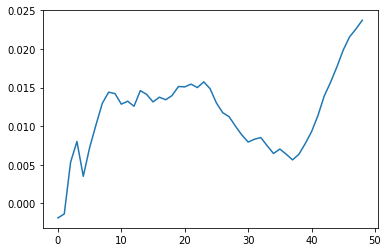

In [82]:
matplotlib.pyplot.plot(train_errors);

In [83]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, y_train)
y_k_predict = knn.predict(X_train)

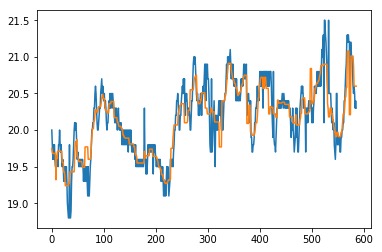

In [84]:
matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(y_k_predict.reshape(y_k_predict.shape[0]));

In [85]:
D_in = 5
D_out = 1
N = X_train.shape[0]

In [86]:
# Zufällige initialisierung der Gewichte
w = np.random.randn(D_in, D_out)
w

array([[-0.09647593],
       [-0.3408759 ],
       [ 1.36675619],
       [-1.28795825],
       [ 0.72472501]])

In [87]:
learning_rate = 1e-1

In [88]:
loss_hist = []
# Train
for t in range(1000):
    # Berechne die Vorhersage
    y_pred = X_train.dot(w)
    y_pred = y_pred.reshape(y_pred.shape[0])
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = np.square(y_pred - y_train).sum()
    if t % 1 == 0:
        loss_hist.append(loss)
        print(t, loss)

    # Berechne die Gradienten von w1 im Bezug auf den Fehler 
    grad_y_pred = 2.0 * (y_pred - y_train)
    grad_w = (1/N) * X_train.T.dot(grad_y_pred)

    # Aktualisiere die Gewichte mittels Gradienten Abstieg
    w -= learning_rate * grad_w.reshape(5,1)

0 220679.21989590334
1 150583.80925038637
2 106744.19820373834
3 79318.51689431339
4 62154.32597361986
5 51405.54674327026
6 44667.867989879465
7 40438.26615440093
8 37777.13721838621
9 36097.08647102056
10 35030.89542912714
11 34348.9844663866
12 33907.81650559567
13 33617.64277971012
14 33422.339827195116
15 33286.805035506324
16 33189.07723206014
17 33115.41102733177
18 33057.197627001726
19 33009.03992150132
20 32967.549145810895
21 32930.59261291027
22 32896.82342633413
23 32865.38646636087
24 32835.734570533285
25 32807.51360056568
26 32780.49057291651
27 32754.508710525733
28 32729.459324576732
29 32705.264218008022
30 32681.864667269667
31 32659.214517100445
32 32637.27584721534
33 32616.01624748217
34 32595.40709929599
35 32575.422486613345
36 32556.038501233626
37 32537.232795137745
38 32518.984287845185
39 32501.272971228835
40 32484.07977578057
41 32467.386475795753
42 32451.17561936959
43 32435.430474365363
44 32420.134984808585
45 32405.27373422078
46 32390.831913695223
4

400 31787.6925574127
401 31787.678658966124
402 31787.66501103814
403 31787.651609112727
404 31787.638448755293
405 31787.62552561119
406 31787.612835404303
407 31787.600373935624
408 31787.588137081828
409 31787.576120793965
410 31787.564321096062
411 31787.552734083838
412 31787.541355923422
413 31787.530182850045
414 31787.519211166815
415 31787.5084372435
416 31787.49785751533
417 31787.48746848177
418 31787.477266705424
419 31787.467248810855
420 31787.457411483483
421 31787.447751468477
422 31787.43826556971
423 31787.428950648642
424 31787.41980362333
425 31787.410821467383
426 31787.402001209
427 31787.393339929913
428 31787.384834764493
429 31787.37648289875
430 31787.36828156944
431 31787.360228063124
432 31787.352319715283
433 31787.34455390942
434 31787.336928076213
435 31787.32943969268
436 31787.322086281263
437 31787.314865409135
438 31787.30777468727
439 31787.30081176973
440 31787.29397435288
441 31787.28726017458
442 31787.280667013496
443 31787.274192688317
444 31787

804 31786.92195513906
805 31786.92194619054
806 31786.921937403313
807 31786.921928774467
808 31786.921920301145
809 31786.921911980535
810 31786.921903809904
811 31786.92189578653
812 31786.92188790777
813 31786.92188017101
814 31786.921872573697
815 31786.921865113323
816 31786.921857787405
817 31786.921850593528
818 31786.921843529315
819 31786.921836592424
820 31786.92182978056
821 31786.92182309147
822 31786.921816522947
823 31786.92181007281
824 31786.921803738933
825 31786.921797519204
826 31786.921791411587
827 31786.92178541405
828 31786.921779524615
829 31786.921773741324
830 31786.921768062268
831 31786.92176248557
832 31786.92175700939
833 31786.921751631908
834 31786.92174635135
835 31786.921741165963
836 31786.921736074037
837 31786.92173107389
838 31786.921726163862
839 31786.921721342333
840 31786.9217166077
841 31786.921711958406
842 31786.92170739291
843 31786.921702909705
844 31786.921698507293
845 31786.92169418424
846 31786.921689939103
847 31786.921685770474
848 3

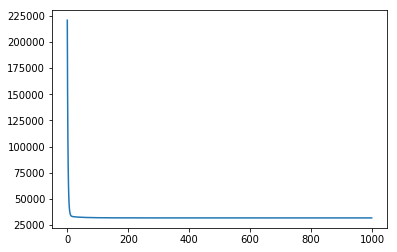

In [89]:
matplotlib.pyplot.plot(loss_hist);

In [90]:
y_pred = X_train.dot(w)

In [91]:
len(list(y_pred.reshape(y_pred.shape[0])))

586

In [92]:
sklearn.metrics.mean_squared_error(list(y_train), list(y_pred.reshape(y_pred.shape[0])))

54.243893298130075

In [93]:
len(list(y_train))

586

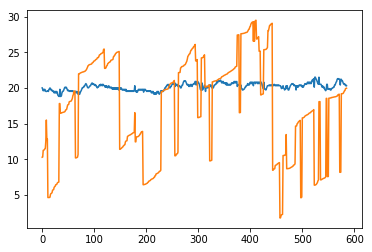

In [94]:

matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(list(y_pred));

In [95]:
#error = 
error = list(np.array(list(y_train)) - np.array(list(y_pred.reshape(y_pred.shape[0]))))

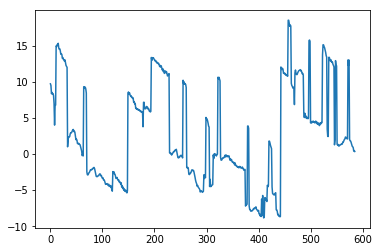

In [96]:
matplotlib.pyplot.plot(error);